# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Shelomita Putrinda Culio
- **Email:** shelomitapc@gmail.com
- **ID Dicoding:** m014b4kx4133

## Menentukan Pertanyaan Bisnis

- Who are the best-performing sellers in e-commerce based on orders and sales?
- What products category name in e-commerce are the most and least sold?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

The data used in this analysis process will include data from the tables customers, sellers, products, product_category_name_translation, orders, and order_items. Therefore, the data gathering process will involve these 6 tables.

**1. Loading the customers table**

The customers table is loaded and converted into a DataFrame named `customers_df`.

In [2]:
customers_df = pd.read_csv('customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409.0,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790.0,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151.0,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775.0,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056.0,campinas,SP


**2. Loading the sellers table**

The sellers table is loaded and converted into a DataFrame named `sellers_df`.

In [3]:
sellers_df = pd.read_csv('sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**3. Loading the products table**

The products table is loaded and converted into a DataFrame named `products_df`.

In [4]:
products_df = pd.read_csv('products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**4. Loading the product_category_name_translation table**

The product_category_name_translation table is loaded and converted into a DataFrame named `products_name_df`.

In [5]:
products_name_df = pd.read_csv('product_category_name_translation.csv')
products_name_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**5. Loading the orders table**

The orders table is loaded and converted into a DataFrame named `orders_df`.

In [7]:
orders_df = pd.read_csv('orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**6. Loading the order_items table**

The order_items table is loaded and converted into a DataFrame named `order_items_df`.

In [8]:
order_items_df = pd.read_csv('order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


**Insight :**
- The data obtained from these tables includes information related to customers (customers table), information related to sellers (sellers table), information about the products in e-commerce (products table), translations of product category names (product_category_name_translation), order information (orders table), and details of items in orders (order_items table).
- Information from the sellers, order_items, and orders tables can be used to identify the best-performing sellers.
- Information from the products, product_category_name_translation, order_items, and orders tables can be used to determine which products are the most or least sold.
- Information from the customers and other table can be used to determine RFM analysis.

### Assessing Data

**1. Assessing `customers_df` data**

In [9]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46159 entries, 0 to 46158
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               46159 non-null  object 
 1   customer_unique_id        46158 non-null  object 
 2   customer_zip_code_prefix  46158 non-null  float64
 3   customer_city             46158 non-null  object 
 4   customer_state            46158 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.8+ MB


In [10]:
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,1
customer_zip_code_prefix,1
customer_city,1
customer_state,1


The data consists of 99,441 entries, and no issues were found with the data types of each column or any missing values.

In [11]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


No duplicate data was found in the DataFrame.

In [12]:
customers_df.describe()

,customer_zip_code_prefix
count,46158.000000
mean,35045.717405
std,29736.855839
min,1003.000000
25%,11355.000000
50%,24355.000000
75%,58280.000000
max,99990.000000


Based on the summary results, no anomalies related to the data were found. Therefore, it can be concluded that there are no issues with the `customers_df` DataFrame.

**2. Assessing `sellers_df` data**

In [13]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [14]:
sellers_df.isna().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


The data consists of 3,095 entries, and no data type errors or missing values were found in the DataFrame.

In [15]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())

Jumlah duplikasi:  0


No duplicate data was found in the DataFrame.

In [16]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


Based on the summary results, no anomalies related to the data were found. Therefore, it can be concluded that there are no issues with the `sellers_df` DataFrame.

**3. Assessing `products_df` data**

In [17]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [18]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


The data consists of 32,951 entries, with missing values found in several columns: 610 missing values in `product_category_name`, 610 in `product_name_length`, 610 in `product_description_length`, 610 in `product_photos_qty`, 2 in `product_weight_g`, 2 in `product_height_cm`, and 2 in `product_width_cm`.

There are no errors in the data types of the columns.

In [19]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


No duplicate data was found in the DataFrame.

In [20]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


There are anomalies in the summary, such as the minimum value of `product_weight_g` being 0, which indicates that there are products without weight (likely an inaccurate value).

Therefore, it can be concluded that:
- There are missing values in the columns: `product_category_name`, `product_name_length`, `product_description_length`, `product_photos_qty`, `product_weight_g`, `product_height_cm`, and `product_width_cm`.
- There is an inaccurate minimum value in the `product_weight_g` column.

**4. Assessing `product_name_df` data**

In [21]:
products_name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [22]:
products_name_df.isna().sum()

,0
product_category_name,0
product_category_name_english,0


The data consists of 71 entries, with no errors found in the data types of the columns or any missing values.

In [23]:
print("Jumlah duplikasi: ", products_name_df.duplicated().sum())

Jumlah duplikasi:  0


No duplicate data was found in the DataFrame.

In [24]:
products_name_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


Based on the summary results, no anomalies related to the data were found. Therefore, it can be concluded that there are no issues with the `product_name_df` DataFrame.

**5. Assessing `orders_df` data**

In [25]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


The data consists of 99,441 entries, where there are missing values and data type errors. The columns `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, and `order_estimated_delivery_date` should have the data type of datetime.

In [26]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


There are 160 missing values in the `order_approved_at` column, 1,783 missing values in the `order_delivered_carrier_date` column, and 2,965 missing values in the `order_delivered_customer_date` column.

In [27]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


No duplicate data was found in the DataFrame.

In [28]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Based on the summary above, no anomalies were found in the data.

Therefore, it can be concluded that:
- There are missing values in the columns `order_approved_at`, `order_delivered_carrier_date`, and `order_delivered_customer_date`.
- There are data type errors in the columns `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, and `order_estimated_delivery_date` that should have the datetime data type.

**6. Assessing `order_items_df` data**

In [29]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [30]:
order_items_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


The data consists of 112,650 entries, with no missing values. However, there is a data type error in the `shipping_limit_date` column, which should have the data type of datetime.

In [31]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


No duplicate data was found in the DataFrame.

In [32]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Based on the summary above, no anomalies were found in the data.

Therefore, it can be concluded that:
- There is a data type error in the `shipping_limit_date` column.

**Insight :**
- There are no significant issues with the `customers_df`, `sellers_df`, and `products_name_df` DataFrames.
- In the `products_df` DataFrame, there are missing values in several columns (`product_category_name`, `product_name_length`, `product_description_length`, `product_photos_qty`, `product_weight_g`, `product_height_cm`, and `product_width_cm`) and an inaccurate minimum value in the `product_weight_g` column.
- In the `orders_df` DataFrame, there are missing values in several columns (`order_approved_at`, `order_delivered_carrier_date`, and `order_delivered_customer_date`) and data type errors in several columns (`order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, and `order_estimated_delivery_date`) that should be of datetime type.
- In the `order_items_df` DataFrame, there is a data type error in the `shipping_limit_date` column that should be of datetime type.

### Cleaning Data

**1. Cleaning products_df**

**a. Handling missing values**

Handling missing values in the `product_category_name` column

In [33]:
products_df[products_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


Based on the results above, it was found that missing values in the `product_category_name` column are also accompanied by missing values in several other columns, such as `product_name_length`, `product_description_length`, and `product_photos_qty`. As a result, these rows tend to provide little meaningful information.

Therefore, the rows can be dropped using the code below :

In [34]:
products_df = products_df.dropna(subset=['product_category_name'])

order_items_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


After applying the dropping method, it can be seen that the missing values in the other columns have also been removed.

**b. Handling innacurate minimum value**

Before proceeding, we will inspect the rows in the `product_weight_g` column that contain inaccurate values, which is the rows with the minimum value.

In [35]:
products_df[products_df.product_weight_g == products_df.product_weight_g.min()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
9769,81781c0fed9fe1ad6e8c81fca1e1cb08,cama_mesa_banho,51.0,529.0,1.0,0.0,30.0,25.0,30.0
13683,8038040ee2a71048d4bdbbdc985b69ab,cama_mesa_banho,48.0,528.0,1.0,0.0,30.0,25.0,30.0
14997,36ba42dd187055e1fbe943b2d11430ca,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0
32079,e673e90efa65a5409ff4196c038bb5af,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0


It was found that all products with inaccurate values are the same product. Therefore, we will try using the imputation method, where the values used come from the same product in the dataset (with the same length, height, and width) as follows:

In [36]:
cama_mesa_banho_products = products_df[
    (products_df['product_category_name'] == 'cama_mesa_banho') &
    (products_df['product_length_cm'] == 30.0) &
    (products_df['product_height_cm'] == 25.0) &
    (products_df['product_width_cm'] == 30.0)
]
print(cama_mesa_banho_products)

                             product_id product_category_name  \
1731   500909059ad72b36b2554150cc327edb       cama_mesa_banho   
9769   81781c0fed9fe1ad6e8c81fca1e1cb08       cama_mesa_banho   
13683  8038040ee2a71048d4bdbbdc985b69ab       cama_mesa_banho   
14997  36ba42dd187055e1fbe943b2d11430ca       cama_mesa_banho   
32079  e673e90efa65a5409ff4196c038bb5af       cama_mesa_banho   

       product_name_lenght  product_description_lenght  product_photos_qty  \
1731                  39.0                      1140.0                 1.0   
9769                  51.0                       529.0                 1.0   
13683                 48.0                       528.0                 1.0   
14997                 53.0                       528.0                 1.0   
32079                 53.0                       528.0                 1.0   

       product_weight_g  product_length_cm  product_height_cm  \
1731             3100.0               30.0               25.0   
9769      

In the results, it can be seen that there are other products that are identical with a weight of 3100.0 g. Therefore, we will use that value for imputation. The minimum value in `product_weight_g` has also changed, as shown in the table below.

In [37]:
products_df.loc[products_df['product_weight_g'] == products_df['product_weight_g'].min(), 'product_weight_g'] = 3100.0

products_df.describe()


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32340.000000,32340.000000,32340.000000,32340.000000
mean,48.476949,771.495285,2.188986,2277.340012,30.854545,16.958813,23.208596
std,10.245741,635.115225,1.736766,4279.226690,16.955965,13.636115,12.078762
min,5.000000,4.000000,1.000000,2.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**2. Cleaning orders_df**

**a. Handiling missing values**

Handling missing values in the `order_approved_at` column

In [38]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


Therefore, the missing values in the `order_approved_at`, `order_delivered_carrier_date`, and `order_delivered_customer_date` columns are in rows where the `order_status` is `canceled` (indicating that they were not shipped). Hence, no action will be taken.

**b. Handling error data types**

The data types of the columns order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, and order_estimated_delivery_date will be changed to datetime.

In [39]:
datetime_columns = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


The data types have been changed to datetime, as shown in the information above.

**3. Cleaning order_items_df**

Converting the data type of the `shipping_limit_date` column to datetime.

In [40]:
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

The code above will convert the data type of the `shipping_limit_date` column to datetime, as demonstrated in the result below.

In [41]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


**Insight :**
- The data cleaning process on `products_df` was performed by dropping rows with missing values (as the missing values in several columns indicated that they did not provide significant information) and applying imputation for inaccurate values.
- The data cleaning process on `orders_df` involved adjusting the data types of several columns to datetime.
- The data processing on `order_items_df` was carried out by adjusting the data types of `shipping_limit_date` columns to datetime.

## Exploratory Data Analysis (EDA)

### Explore customers_df

In [42]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,46159,46158,46158.000000,46158,46158
unique,46159,45383,NaN,3218,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,6,NaN,7218,19331
mean,NaN,NaN,35045.717405,NaN,NaN
std,NaN,NaN,29736.855839,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11355.000000,NaN,NaN
50%,NaN,NaN,24355.000000,NaN,NaN
75%,NaN,NaN,58280.000000,NaN,NaN


Based on the summary of these statistical parameters, it can be seen that the number of customers in the e-commerce platform (based on unique customer IDs) is 99,441. These customers are spread across 4,119 cities and 27 states, with the highest number of customers coming from the city of Sao Paulo (15,540 customers) and the state of SP (41,746 customers).

In [43]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,7218
rio de janeiro,3275
belo horizonte,1281
brasilia,983
curitiba,687
...,...
francisco sa,1
pontalinda,1
pontalina,1


Using the group by method based on `customer_city`, we identified the cities with the highest number of customers in the e-commerce platform, which are São Paulo, Rio de Janeiro, Belo Horizonte, Brasília, and Curitiba.

In [44]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,19331
RJ,6116
MG,5413
RS,2535
PR,2327
SC,1652
BA,1544
DF,987
ES,936


Using the group by method based on `customer_state`, we identified the states with the highest number of customers in the e-commerce platform, which are SP, RJ, MG, RS, and PR.

**Insight :**
- The number of customers on the e-commerce platform (based on unique customer IDs) is 99,441 sellers.
- The city of Sao Paulo and the state of SP are the regions with the highest number of customers in the e-commerce platform.

### Explore sellers_df

In [45]:
sellers_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


Based on the summary of these statistical parameters, it can be seen that the number of sellers on the e-commerce platform (based on unique seller IDs) is 3095. These sellers are spread across 611 cities and 23 states, with the highest number of sellers coming from the city of São Paulo (694 sellers) and the state of SP (1,849 sellers).

In [46]:
sellers_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False)

,seller_id
seller_city,
sao paulo,694
curitiba,127
rio de janeiro,96
belo horizonte,68
ribeirao preto,52
...,...
ivoti,1
itirapina,1
itau de minas,1


Based on the data above, there is the ranking of cities that have the highest number of sellers.

In [47]:
sellers_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False)

,seller_id
seller_state,
SP,1849
PR,349
MG,244
SC,190
RJ,171
RS,129
GO,40
DF,30
ES,23


Based on the data above, there is the ranking of states that have the highest number of sellers.

**Insight:**
- The number of sellers on the e-commerce platform (based on unique seller IDs) is 3,095.
- The city of Sao Paulo and the state of SP are the regions with the highest number of sellers in the e-commerce platform.

### Explore products_df dan product_name_df (product_and_names_df)

To ensure that the product category names are well-recognized, the `products_df` and `product_name_df` are merged so that the resulting dataframe contains the translated product category names in English.

In [48]:
products_and_names_df = products_df.merge(products_name_df, on='product_category_name', how='left')
products_and_names_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [49]:
products_and_names_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
count,32341,32341,32341.000000,32341.000000,32341.000000,32340.000000,32340.000000,32340.000000,32340.000000,32328
unique,32341,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bed_bath_table
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3029
mean,NaN,NaN,48.476949,771.495285,2.188986,2277.340012,30.854545,16.958813,23.208596,NaN
std,NaN,NaN,10.245741,635.115225,1.736766,4279.226690,16.955965,13.636115,12.078762,NaN
min,NaN,NaN,5.000000,4.000000,1.000000,2.000000,7.000000,2.000000,6.000000,NaN
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000,NaN
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000,NaN
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000,NaN


Based on the summary of these statistical parameters, it can be seen that there are 32,951 products across 73 product category names, with the most abundant product category in the e-commerce platform being `cama_mesa_banho`, which translates to `bed_bath_table` in English.

**Insight :**
- The total number of products on the e-commerce platform is 32,951, with 73 product category names.
- The most common product category in the e-commerce platform is cama_mesa_banho or bed_bath_table.

### Explore orders_items_df & orders_df (orders_merge_df)

To obtain complete information related to orders, we merge `order_items_df` and `orders_df` using a left join based on the `order_id`.

In [50]:
orders_merge_df = order_items_df.merge(orders_df, on='order_id', how='left')
orders_merge_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17


To view the number of orders for each order status, we perform a group by operation based on `order_status` as follows :

In [51]:
orders_status_distribution = orders_merge_df.groupby('order_status').size().reset_index(name='num_orders')
orders_status_distribution.head()

,order_status,num_orders
0,approved,3
1,canceled,542
2,delivered,110197
3,invoiced,359
4,processing,357


Based on the results above, it can be seen that the most common order status is delivered with a total of 110,197 orders, while 542 orders were marked as canceled.

### Explore orders_merge_df & sellers_df (orders_and_sellers_df)

To obtain insights related to orders and the respective sellers of those orders, we merge `orders_merge_df` with `sellers_df`. The resulting dataframe can be used to identify the best-performing sellers.

In [52]:
orders_and_sellers_df = orders_merge_df.merge(sellers_df, on='seller_id', how='left')
orders_and_sellers_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,87900,loanda,PR


To identify the best-performing sellers based on the number of orders they have on the e-commerce, we use the group by method based on `seller_id` and sorting the results by the total number of orders completed as follows :

In [53]:
sellers_with_best_total_orders = orders_and_sellers_df.groupby('seller_id').agg(
    total_orders=('order_id', 'nunique'),
).reset_index().sort_values(by='total_orders', ascending=False)

print(sellers_with_best_total_orders)

                             seller_id  total_orders
1235  6560211a19b47992c3666cc44a7e94c0          1854
881   4a3ca9315b744ce9f8e9374361493884          1806
2481  cc419e0650a3c5ba77189a1882b7556a          1706
368   1f50f920176fa81dab994f9023523100          1404
2643  da8622b14eb17ae2831f4ac5b9dab84a          1314
...                                ...           ...
2512  ceb7b4fb9401cd378de7886317ad1b47             1
2513  cecd97bc34ed8330bd4cd15713eda670             1
1124  5b92bfa4120daa27c574daa2e386c693             1
1107  5aaa890629f83706d8d9bfecd8377c1c             1
1547  7d81e74a4755b552267cd5e081563028             1

[3095 rows x 2 columns]


Based on the results, we obtain a ranking of sellers from the highest to the lowest total orders. The seller with the highest total orders is the seller with ID 6560211a19b47992c3666cc44a7e94c0 with total 1,854 orders.

In [54]:
sellers_with_best_total_sales = orders_and_sellers_df.groupby('seller_id').agg(
    total_sales=('price', 'sum'),
    total_freight=('freight_value', 'sum')
).sum(axis=1).reset_index(name='total_sales').sort_values(by='total_sales', ascending=False)

print(sellers_with_best_total_sales)

                             seller_id  total_sales
857   4869f7a5dfa277a7dca6462dcf3b52b2    249640.70
1535  7c67e1448b00f6e969d365cea6b010ab    239536.44
1013  53243585a1d6dc2643021fd1853d8905    235856.68
881   4a3ca9315b744ce9f8e9374361493884    235539.96
3024  fa1c13f2614d7b5c4749cbc52fecda94    204084.73
...                                ...          ...
1370  702835e4b785b67a084280efca355756        18.56
869   4965a7002cca77301c82d3f91b82e1a9        16.36
373   1fa2d3def6adfa70e58c276bb64fe5bb        15.90
1465  77128dec4bec4878c37ab7d6169d6f26        15.22
2519  cf6f6bc4df3999b9c6440f124fb2f687        12.22

[3095 rows x 2 columns]


To identify the best-performing sellers based on total sales on the e-commerce platform, we use the group by method based on `seller_id` and sorting the results by the sum of `price` and `freight_value`. The results show that the seller with ID 4869f7a5dfa277a7dca6462dcf3b52b2 has the highest total sales amounting to 249,640.70.

**Insight:**
- The seller with the highest total orders is the seller with ID 6560211a19b47992c3666cc44a7e94c0, totaling 1,854 orders.
- The seller with the highest total sales is the seller with ID 4869f7a5dfa277a7dca6462dcf3b52b2, amounting to 249,640.70.

### Explore orders_and_sellers_df & customers_df & products_and_names_df (all_df)

To consolidate all the information from the six tables, a single table named `all_df` is created by merging the `orders_and_sellers_df` with `customers_df`, and then further merging it with `products_and_names_df`.

In [55]:
orders_with_customers = orders_and_sellers_df.merge(customers_df, on='customer_id', how='left')
orders_with_customers.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,27277,volta redonda,SP,NaN,NaN,NaN,NaN
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,3471,sao paulo,SP,eb28e67c4c0b83846050ddfb8a35d051,15775.0,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,37564,borda da mata,MG,3818d81c6709e39d06b2738a8d3a2474,35661.0,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,14403,franca,SP,NaN,NaN,NaN,NaN
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,87900,loanda,PR,64b576fb70d441e8f1b2d7d446e483c5,13226.0,varzea paulista,SP


In [56]:
all_df = orders_with_customers.merge(products_and_names_df, on='product_id', how='left')
all_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,NaN,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,SP,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,MG,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,NaN,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,SP,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


With this dataframe, we can identify the products with the highest and lowest total orders by using the group by method based on `product_category_name_english` (for easier understanding in English).

In [57]:
product_sales_overall = all_df.groupby('product_category_name_english').agg(total_orders=('order_id', 'nunique')).reset_index()

# Product name category are the most sold
product_sales_descending = product_sales_overall.sort_values(by='total_orders', ascending=False)
print(product_sales_descending)

# Product name category are the least sold
product_sales_ascending = product_sales_overall.sort_values(by='total_orders', ascending=True)
print(product_sales_ascending)

   product_category_name_english  total_orders
7                 bed_bath_table          9417
43                 health_beauty          8836
65                sports_leisure          7720
15         computers_accessories          6689
39               furniture_decor          6449
..                           ...           ...
3          arts_and_craftmanship            23
52                    la_cuisine            13
11             cds_dvds_musicals            12
29     fashion_childrens_clothes             8
61         security_and_services             2

[71 rows x 2 columns]
   product_category_name_english  total_orders
61         security_and_services             2
29     fashion_childrens_clothes             8
11             cds_dvds_musicals            12
52                    la_cuisine            13
3          arts_and_craftmanship            23
..                           ...           ...
39               furniture_decor          6449
15         computers_accessories     

**Insight:**
- The product category with the highest sales is bed_bath_table, with 9,417 orders.
- The product category with the lowest sales is security_and_services.

### Insight

Based on the data exploration conducted, the following insights related to the analysis questions were obtained:

* The seller with the highest total orders is the seller with ID 6560211a19b47992c3666cc44a7e94c0, totaling 1,854 orders, while the seller with the highest total sales is the seller with ID 4869f7a5dfa277a7dca6462dcf3b52b2, amounting to 249,640.70.
* The product category with the highest sales is bed_bath_table, with 9,417 orders whereas the product category with the lowest sales is security_and_services with 2 orders.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Who are the best-performing sellers in e-commerce based on orders and sales?

- To identify the best-performing sellers based on the number of orders they have on the e-commerce, we use the group by method based on `seller_id` and sorting the results by the total number of orders completed as follows.
- To identify the best-performing sellers based on total sales on the e-commerce platform, we use the group by method based on `seller_id` and sorting the results by the sum of `price` and `freight_value`.

In [58]:
sellers_with_best_total_orders = all_df.groupby('seller_id').agg(
    total_orders=('order_id', 'nunique'),
).reset_index().sort_values(by='total_orders', ascending=False)

sellers_with_best_total_orders.head()

,seller_id,total_orders
1235,6560211a19b47992c3666cc44a7e94c0,1854
881,4a3ca9315b744ce9f8e9374361493884,1806
2481,cc419e0650a3c5ba77189a1882b7556a,1706
368,1f50f920176fa81dab994f9023523100,1404
2643,da8622b14eb17ae2831f4ac5b9dab84a,1314


In [59]:
sellers_with_best_total_sales = all_df.groupby('seller_id').agg(
    total_sales=('price', 'sum'),
    total_freight=('freight_value', 'sum')
).sum(axis=1).reset_index(name='total_sales').sort_values(by='total_sales', ascending=False)

sellers_with_best_total_sales.head()

,seller_id,total_sales
857,4869f7a5dfa277a7dca6462dcf3b52b2,249640.70
1535,7c67e1448b00f6e969d365cea6b010ab,239536.44
1013,53243585a1d6dc2643021fd1853d8905,235856.68
881,4a3ca9315b744ce9f8e9374361493884,235539.96
3024,fa1c13f2614d7b5c4749cbc52fecda94,204084.73


Next, a data visualization will be created in the form of a bar chart as follows:

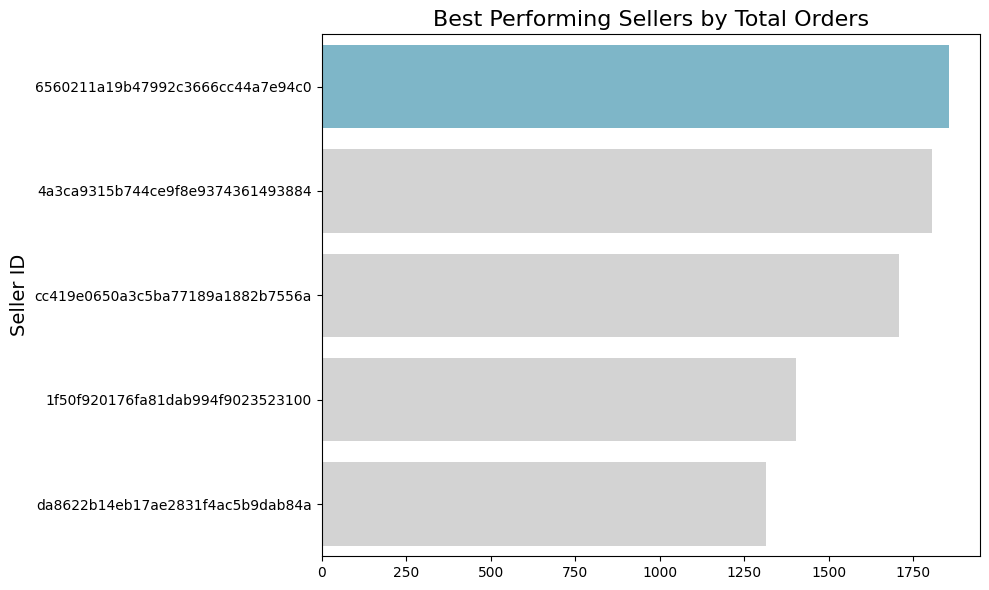

In [60]:
best_sellers_by_orders = sellers_with_best_total_orders.head(5)

plt.figure(figsize=(10, 6))
colors = ["#72BCD4"] + ["#D3D3D3"] * (len(best_sellers_by_orders) - 1)

sns.barplot(x="total_orders", y="seller_id", data=best_sellers_by_orders, palette=colors, hue="seller_id", dodge=False)
plt.ylabel('Seller ID', fontsize=14)
plt.xlabel('')
plt.title("Best Performing Sellers by Total Orders", loc="center", fontsize=16)
plt.tick_params(axis='y', labelsize=10)
plt.tight_layout()
plt.show()

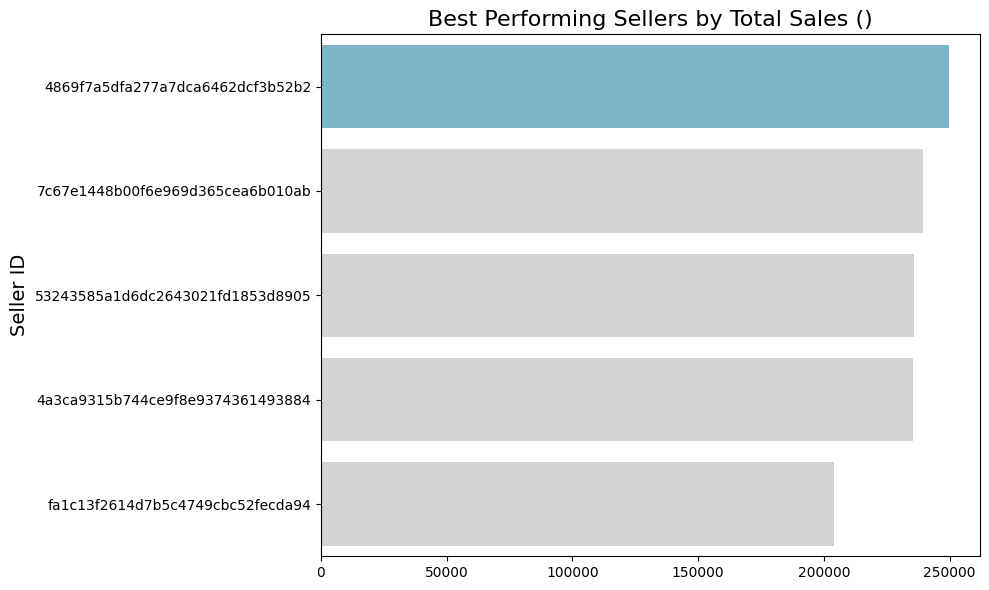

In [61]:
best_sellers_by_sales = sellers_with_best_total_sales.head(5)

plt.figure(figsize=(10, 6))
colors = ["#72BCD4"] + ["#D3D3D3"] * (len(best_sellers_by_sales) - 1)

sns.barplot(x="total_sales", y="seller_id", data=best_sellers_by_sales, palette=colors, hue="seller_id", dodge=False)
plt.ylabel('Seller ID', fontsize=14)
plt.title("Best Performing Sellers by Total Sales ()", loc="center", fontsize=16)
plt.tick_params(axis='y', labelsize=10)
plt.xlabel('')
plt.tight_layout()
plt.show()

### Pertanyaan 2: What products category name in e-commerce are the most and least sold?

To identify the product category names with the most and least sales, the groupby method is used based on the product category name (in English) by summing the total unique order IDs (total orders), then sorted in descending order to find the most sold and in ascending order to find the least sold.

In [62]:
product_sales_overall = all_df.groupby('product_category_name_english').agg(total_orders=('order_id', 'nunique')).reset_index()

In [63]:
# Product name category are the most sold
product_sales_descending = product_sales_overall.sort_values(by='total_orders', ascending=False)
product_sales_descending.head()

,product_category_name_english,total_orders
7,bed_bath_table,9417
43,health_beauty,8836
65,sports_leisure,7720
15,computers_accessories,6689
39,furniture_decor,6449


In [64]:
# Product name category are the least sold
product_sales_ascending = product_sales_overall.sort_values(by='total_orders', ascending=True)
product_sales_ascending.head()

,product_category_name_english,total_orders
61,security_and_services,2
29,fashion_childrens_clothes,8
11,cds_dvds_musicals,12
52,la_cuisine,13
3,arts_and_craftmanship,23


Next, a data visualization will be created in the form of a bar chart as follows:

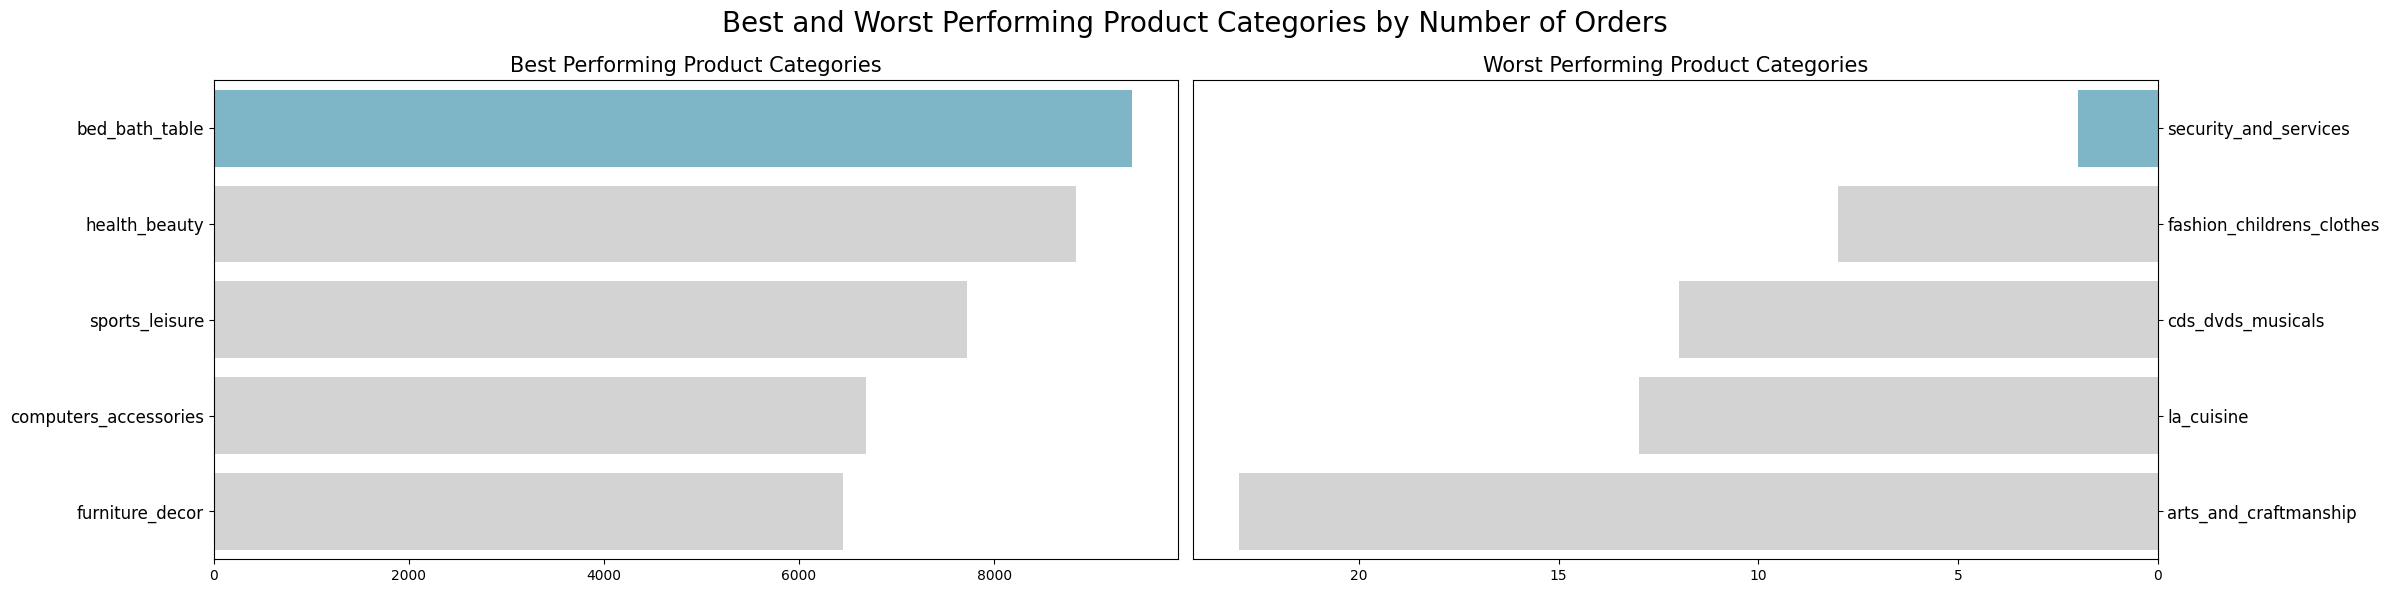

In [65]:
product_sales_descending = product_sales_overall.sort_values(by='total_orders', ascending=False).head(5)
product_sales_ascending = product_sales_overall.sort_values(by='total_orders', ascending=True).head(5)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
colors = ["#72BCD4"] + ["#D3D3D3"] * (len(product_sales_descending) - 1)

# Most Sold
sns.barplot(x="total_orders", y="product_category_name_english", data=product_sales_descending,
            palette=colors, hue="product_category_name_english", ax=ax[0], dodge=False)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product Categories", loc="center", fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

# Least Sold
sns.barplot(x="total_orders", y="product_category_name_english", data=product_sales_ascending,
            palette=colors, hue="product_category_name_english", ax=ax[1], dodge=False)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product Categories", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product Categories by Number of Orders", fontsize=20)
plt.tight_layout()
plt.show()

### Insight :


- The seller with the highest total orders is the seller with ID 6560211a19b47992c3666cc44a7e94c0, diikuti dengan 4a3ca9315b744ce9f8e937436149388, cc419e0650a3c5ba77189a1882b7556a, 1f50f920176fa81dab994f9023523100, and da8622b14eb17ae2831f4ac5b9dab84a
- The seller with the highest total sales is the seller with ID 4869f7a5dfa277a7dca6462dcf3b52b2, diikuti dengan 7c67e1448b00f6e969d365cea6b010ab, 53243585a1d6dc2643021fd1853d8905, 4a3ca9315b744ce9f8e9374361493884, and fa1c13f2614d7b5c4749cbc52fecda94
- The product category with the highest sales is bed_bath_table, whereas the product category with the lowest sales is security_and_services.

## Analisis Lanjutan (Opsional) : RFM Analysis

**1. Recency**

To determine the last time a customer made a transaction, we extract the most recent order date from `all_df` (the maximum datetime from the `order_purchase_timestamp` column) based on `customer_unique_id`.

**2. Frequency**

To determine how frequently a customer makes transactions, we calculate the total number of unique `order_id` values based on `customer_unique_id`.

**3. Monetary**

To determine the total revenue generated by a customer, we calculate the sum of the `price` and `freight_value` (which is equivalent to the `payment_value`) based on the `customer_unique_id`.

In [74]:
all_df["order_purchase_timestamp"] = pd.to_datetime(all_df["order_purchase_timestamp"])

rfm_df = all_df.groupby(by="customer_unique_id", as_index=False).agg({
    "order_purchase_timestamp": "max",
    "order_id": "nunique",
    "price": "sum",
    "freight_value": "sum"
})

rfm_df["monetary"] = rfm_df["price"] + rfm_df["freight_value"]
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "price", "freight_value", "monetary"]
rfm_df["max_order_timestamp"] = pd.to_datetime(rfm_df["max_order_timestamp"])
recent_date = pd.to_datetime(all_df["order_purchase_timestamp"]).max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df.drop(["max_order_timestamp", "price", "freight_value"], axis=1, inplace=True)

rfm_df.head()

,customer_id,frequency,monetary,recency
0,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,118
1,0000f46a3911fa3c0805444483337064,1,86.22,541
2,0004bd2a26a76fe21f786e4fbd80607f,1,166.98,150
3,00050ab1314c0e55a6ca13cf7181fecf,1,35.38,135
4,0005ef4cd20d2893f0d9fbd94d3c0d97,1,129.76,174


The results above provide information regarding the value of a customer, including how frequently the customer makes transactions, the size of their transactions, and how many orders they have placed on the e-commerce platform. The data can be visualized as follows :

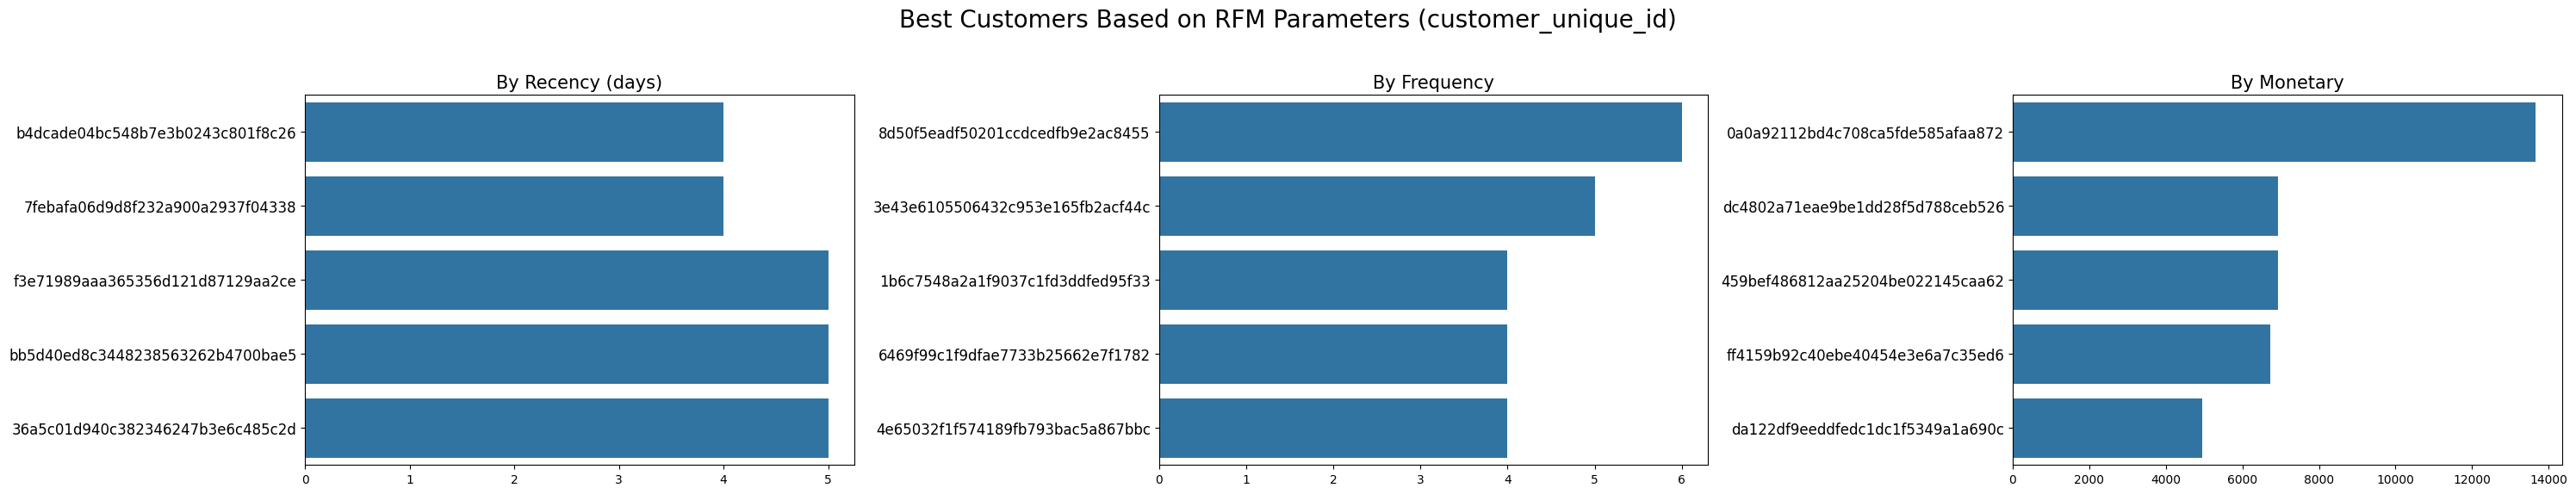

In [75]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

# Recency
sns.barplot(x="recency", y="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel("")
ax[0].set_title("By Recency (days)", loc="center", fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

# Frequency
sns.barplot(x="frequency", y="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel("")
ax[1].set_title("By Frequency", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

# Monetary
sns.barplot(x="monetary", y="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel("")
ax[2].set_title("By Monetary", loc="center", fontsize=15)
ax[2].tick_params(axis='y', labelsize=12)

plt.suptitle("Best Customers Based on RFM Parameters (customer_unique_id)", fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Based on the visualization results above, it can be seen that
- The customer with the lowest recency is the one with ID **b4dcade04bc548b7e3b0243c801f8c26** (the customer who made a recent order)
- The customer with the highest frequency is the one with ID **8d50f5eadf50201ccdcedfb9e2ac8455** (frequently places orders)
- The customer with the highest monetary value is the one with ID **0a0a92112bd4c708ca5fde585afaa872** (makes orders with the highest total value).

## Conclusion

- Answering first questions : The seller with the highest total orders is the seller with ID 6560211a19b47992c3666cc44a7e94c0, totaling 1,854 orders, while the seller with the highest total sales is the seller with ID 4869f7a5dfa277a7dca6462dcf3b52b2, amounting to 249,640.70.
- Answering second questions : The product category with the highest sales is bed_bath_table with 9,417 orders, whereas the product category with the lowest sales is security_and_services with 2 orders

In [68]:
all_df.to_csv("all_data.csv", index=False)